## Facebook Bidding Bot Detection

#### Package import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

#### Data loading 

In [2]:
train_accounts = pd.read_csv('train_accounts.csv')
test_accounts = pd.read_csv('test_accounts.csv')
train_bids = pd.read_csv('train_bids.csv')
test_bids = pd.read_csv('test_bids.csv')

In [3]:
train_accounts.head()
# outcome: 1, robot;  0, human

,bidder_id,payment_account,address,outcome
0,ea5948061b2059bcbd900d3ae7e86e428ae8g,cee2b2bb0c91cac4cf7c3d0a7f6f0dddt2lku,a3d2de7675556553a5f08e4c88d2c228n7xkp,0.0
1,6ed7b95dcea7b359248e9efce91cbb11lm7hf,b99d8ade6b54244634c184837e71a0c2zb0xg,3df736ae35c2d07da1f522484c0e68c2yi8x1,0.0
2,b1bc9ff2b98df742affda07c5977c7345dpm5,8d6440f57adbd2563c102f4226c0e014b2wzs,dbc5678b0387bff64d5df269b116806cx8uh8,0.0
3,56cfe8b0d574e1df3f823c2cf32226eff52uw,a3d2de7675556553a5f08e4c88d2c2283qq7l,bc94c8f4b1df26180566a8b5612d868e7gpwg,0.0
4,3d94b376bae8dd60eea48ded36134a3962glw,a3d2de7675556553a5f08e4c88d2c228vswfg,a79c0f5caf9727c13b5f1b9df6fc072eg5j2y,0.0


In [4]:
test_accounts.head()

,bidder_id,payment_account,address
0,fb92fc925c5df50f4da7874a7542cf2210z1f,a3d2de7675556553a5f08e4c88d2c2285fa8i,a3d2de7675556553a5f08e4c88d2c228g8zew
1,d29003d7f3ec1f0e4ca9cc17e6389b4a4phcg,a0dc95936282ff8eef7ffa54f295255ctyafs,fa442b098896fe3f9aca16a6f100e597e5rky
2,12d6239a92972a35bc990225b3ab33466znm8,a3d2de7675556553a5f08e4c88d2c228vmub2,15377fd75760546b111f7cfc5d3b7ea3v9dfw
3,d0231e5200b870c055db7e3daae24bc8lt7at,b1b2ce3ff9eba49de46c2b1494944815xrdly,8237603cedb76af6dd5adb06a120deac3vous
4,1ae57d217b27820cabf6e24b721bfb38s6ja0,6dc76e92d02ce4f4af55f858987ce516zpjql,c2e2ffcffb384ca6ced38bbd9a5c5a62bh8wp


In [5]:
train_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9643643578947368,us,44.77.106.238,vasstdc27m7nks3
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9768433263157894,in,57.163.90.101,vasstdc27m7nks3


In [99]:
test_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,1944758,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,lg9bk,office equipment,phone99,9770211736842105,th,59.246.142.163,dzd3lg4xy0irlvg
1,1925420,c670e7fb466b09000f1053d2761752268bkfm,aly3t,office equipment,phone143,9770015157894736,au,165.208.198.120,vasstdc27m7nks3
2,1365920,20ebb9de648c6df989f04d07cf273c7b3yu8c,jefix,mobile,phone224,9767292210526315,us,91.117.186.2,vasstdc27m7nks3
3,1924978,c670e7fb466b09000f1053d2761752268bkfm,k169w,office equipment,phone143,9770010947368421,au,165.208.198.120,vasstdc27m7nks3
4,1304018,20ebb9de648c6df989f04d07cf273c7b3yu8c,71nze,mobile,phone224,9766891789473684,us,91.117.186.2,vasstdc27m7nks3


#### Data description

In [102]:
train_bids.shape

(562753, 9)

In [11]:
test_bids.shape

(71794, 9)

In [103]:
train_bids.describe()

,bid_id,time
count,5.627530e+05,5.627530e+05
mean,3.380500e+06,9.706990e+15
std,2.245705e+06,5.459125e+13
min,2.000000e+01,9.631917e+15
25%,1.357605e+06,9.641877e+15
50%,3.147260e+06,9.704559e+15
75%,5.274860e+06,9.764056e+15
max,7.656319e+06,9.772885e+15


In [104]:
train_bids[['country']].describe()

,country
count,562753
unique,178
top,in
freq,95037


In [105]:
len(train_accounts)

396

#### Data cleaning 

In [106]:
train_bids.isnull().sum()

bid_id         0
bidder_id      0
auction        0
merchandise    0
device         0
time           0
country        0
ip             0
url            0
dtype: int64

#### Feature creation

In [107]:
train_bids[train_bids.bidder_id=='ea5948061b2059bcbd900d3ae7e86e428ae8g'].head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7
133,1082398,ea5948061b2059bcbd900d3ae7e86e428ae8g,kvb6s,mobile,phone97,9765006842105263,ng,198.243.204.92,m5hzfr7tsdui1hc
3334,1641967,ea5948061b2059bcbd900d3ae7e86e428ae8g,4dyrq,mobile,phone3,9768613263157894,in,150.139.76.86,w3bc7wcanxghnnz
5869,1977933,ea5948061b2059bcbd900d3ae7e86e428ae8g,zzzlx,mobile,phone17,9770516894736842,in,214.207.255.106,wy3qb783yf96f5w
13200,2194694,ea5948061b2059bcbd900d3ae7e86e428ae8g,tep1m,mobile,phone17,9771987631578947,in,119.146.107.60,vasstdc27m7nks3


##### Quantitative: feature counts per biddder (account)

In [108]:
train_bids.groupby(['bidder_id'])['ip'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k     55
01349288df20199905e719f0ff7ee771nwryj     49
01a39439e7afbdcfe385eedbddb23d76zgdrg    216
01c5692d487454cdbe731df330bef608f48zz     44
01eb9dcbd0b3e79d94020d13d83a993ec9d2a      3
Name: ip, dtype: int64

In [109]:
train_bids.groupby(['bidder_id'])['device'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k    34
01349288df20199905e719f0ff7ee771nwryj    28
01a39439e7afbdcfe385eedbddb23d76zgdrg    94
01c5692d487454cdbe731df330bef608f48zz    41
01eb9dcbd0b3e79d94020d13d83a993ec9d2a     3
Name: device, dtype: int64

In [110]:
#define a function to calculate all of the aggregated features

def statByFeature(data, features):  
    bidders_statistic = dict()                 #create a dictionary
    
    bidders = data['bidder_id'].unique()       #extract all unique bidder id
    
    
    for feature in features:                   #loop all features
        seg = data[['bidder_id', feature]]     #create a segment dataframe contains bidder id and some feature
        seg_res = seg.groupby('bidder_id')[feature].nunique()\  #group by all bidder id and count the number of 
                     .reset_index(name=feature)                 #all appeared unique features
        
        bidders_statistic[feature] = seg_res  #in bidders_statistic dictionary, feature is the key, seg_res is the value
                                              #for every feature, and each bidder id, count the unique value of that feature 
    
    
    
    res = bidders_statistic[features[0]]      # extract the first coloumn of features in dictionary 
    for feature in features[1:]:
        res = pd.merge(res, bidders_statistic[feature], on='bidder_id')  #merge all features into one dataframe
    return res

In [111]:
features = ['device','ip','url','merchandise','auction','country']
quant_feature_train = statByFeature(train_bids, features)
quant_feature_test = statByFeature(test_bids, features)

In [112]:
quant_feature_train.head()

,bidder_id,device,ip,url,merchandise,auction,country
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,1,13,6
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,1,31,4
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,1,131,26
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,1,19,5
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,1,2,2


##### Qualititive: feature scores per objects (feature)

In [17]:
# merge the two dataframe train_bids and train_accounts on bidder_id, but only save coloumn 'bidder_id' and 'outcome'
# in train_accounts

df_train = pd.merge(train_bids, train_accounts[['bidder_id','outcome']],on='bidder_id')

In [18]:
df_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0
1,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3,0.0
2,5348147,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,aornh,office equipment,phone508,9695972789473684,tw,94.77.24.125,qnvyrbe2q64485d,0.0
3,6956888,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone35,9705076631578947,ke,150.72.18.78,0i79k658qw670j2,0.0
4,5539232,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,vceur,office equipment,phone229,9696822105263157,fr,246.147.189.47,8j97azbkxfm2axh,0.0


In [115]:
# groupby country, and then for each country, sum their outcome together, sort the result in descending order.
df_train.groupby(['country'])['outcome'].sum()\
        .sort_values(ascending=False).head()

country
in    30127.0
th    13535.0
id     9507.0
us     8976.0
ru     8784.0
Name: outcome, dtype: float64

In [116]:
# count all bidding information from India in df_train, we have 95037 information from India but 30127 outcome from India are 1
np.sum(df_train.country=='in')  

95037

In [117]:
# set up an risk score, which is the ration of outcome=1

risk_score_for_in = 30127.0/95037
print risk_score_for_in

0.317002851521


In [13]:
# define a function that calculate

def riskByFeature(data, ref, features):
    res = data
    for feature in features:
        bad = ref.groupby(feature)['outcome'].sum()      #sum all outcome=1 for some feature
        count = ref.groupby(feature)['outcome'].count()  #count all outcome for that feature
        temp = pd.DataFrame(bad/count).reset_index()     #create a dataframe of risk ration 
        temp.columns = [feature, str(feature+'_risk')]   #rename the second coloumn as 'feature risk'
        
        if feature == 'merchandise':          
            infer = np.mean(temp[str(feature+'_risk')])   # calculate mean value of all risk score 
            
            temp = temp.append({'merchandise':'clothing', 'merchandise_risk':infer}, \
                               ignore_index=True)         # replace merchandise_risk with mean value of all risk score
            ## print temp                                 # since 'clothing' doesn't exist in training data
            
        res = pd.merge(res, temp, on=feature)           #merge all into one dataframe on feature
    return res

In [14]:
# training data does not contain 'clothing'
np.unique(train_bids.merchandise)

array(['books and music', 'computers', 'furniture', 'home goods',
       'jewelry', 'mobile', 'office equipment', 'sporting goods'],
      dtype=object)

In [15]:
# test data contains 'clothing'
np.unique(test_bids.merchandise)

array(['books and music', 'clothing', 'computers', 'home goods',
       'jewelry', 'mobile', 'office equipment', 'sporting goods'],
      dtype=object)

In [19]:
#calculate risk for each feature
features = ['auction','device','merchandise','country','ip','url']
risk_summary = riskByFeature(df_train, df_train, features)

In [20]:
risk_summary.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9640271842105263,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636084578947368,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9638806631578947,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636085421052631,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907


In [21]:
#only save 'derive features' coloumn, and calculate mean 
derive_features = ['auction_risk','device_risk','merchandise_risk',\
                   'country_risk','ip_risk','url_risk']
quality_feature_train = pd.DataFrame(risk_summary.groupby('bidder_id')[derive_features].\
                                    mean()).reset_index()

In [22]:
quality_feature_train.head()

,bidder_id,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [23]:
quality_feature_train[quality_feature_train.bidder_id=='ae45f9b94d86f931c84c94f3975e3d7bkv2r0']

,bidder_id,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
255,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.067024,0.124787,0.072759,0.142319,0.041511,0.162831


In [125]:
#same action for test set,calculate their risk
df_test = pd.merge(test_bids, test_accounts[['bidder_id']],on='bidder_id')
risk_summary = riskByFeature(df_test, df_train, features)
quality_feature_test = pd.DataFrame(risk_summary.groupby('bidder_id')[derive_features].\
                                    mean()).reset_index()

In [126]:
quality_feature_test.head()

,bidder_id,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,001068c415025a009fee375a12cff4fcnht8y,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907
2,03244a553a252dcc3a3037f0371c8d33fmpd1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907
3,067ff22ebf0d33fe0deedc816d75973865jo7,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907


#### Exploratory data analysis

##### Histogram -- from sample space

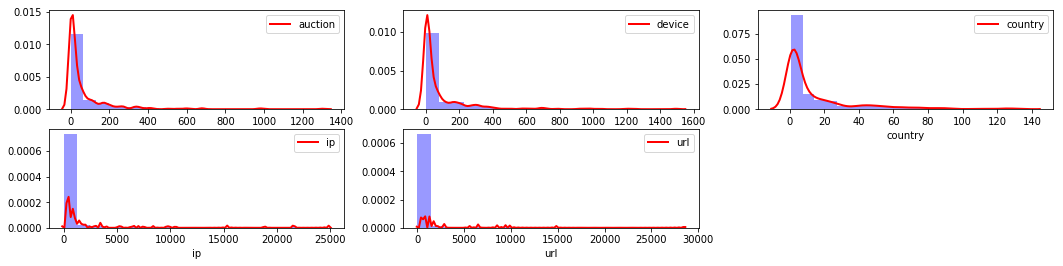

In [127]:
feature = ['auction','device','country','ip','url']
index = 0
plt.figure(figsize=(18,4))
data = quant_feature_train
for fea in feature:
    index += 1
    plt.subplot(2,3, index)
    plt.xlabel(fea)
    sns.distplot(data[fea],\
                 kde=True,bins=20, color='b', \
                 kde_kws={"color": "r", "lw": 2, "label": fea})

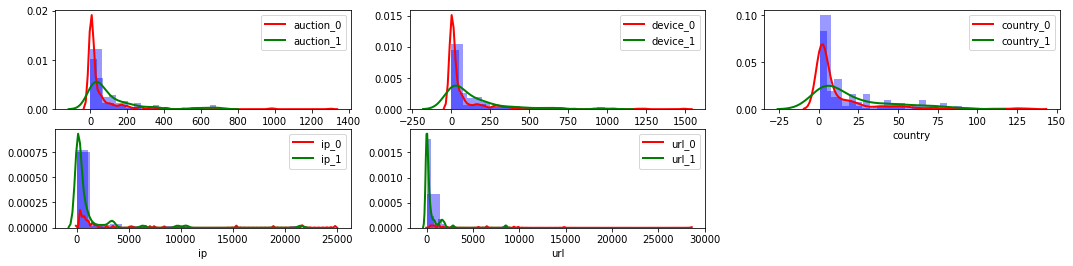

In [128]:
feature = ['auction','device','country','ip','url']
index = 0
plt.figure(figsize=(18,4))
data = pd.merge(quant_feature_train, train_accounts, on='bidder_id')
data_0 = data[data.outcome==0].drop(['payment_account', 'address'],axis=1)
data_1 = data[data.outcome==1].drop(['payment_account', 'address'],axis=1)
for fea in feature:
    index += 1
    plt.subplot(2,3, index)
    plt.xlabel(fea)
    sns.distplot(data_0[fea],kde=True,bins=20, color='b', \
                 kde_kws={"color": "r", "lw": 2, "label": fea+'_0'})
    sns.distplot(data_1[fea],kde=True,bins=20, color='b', \
                 kde_kws={"color": "g", "lw": 2, "label": fea+'_1'})

##### Barplot -- from feature space

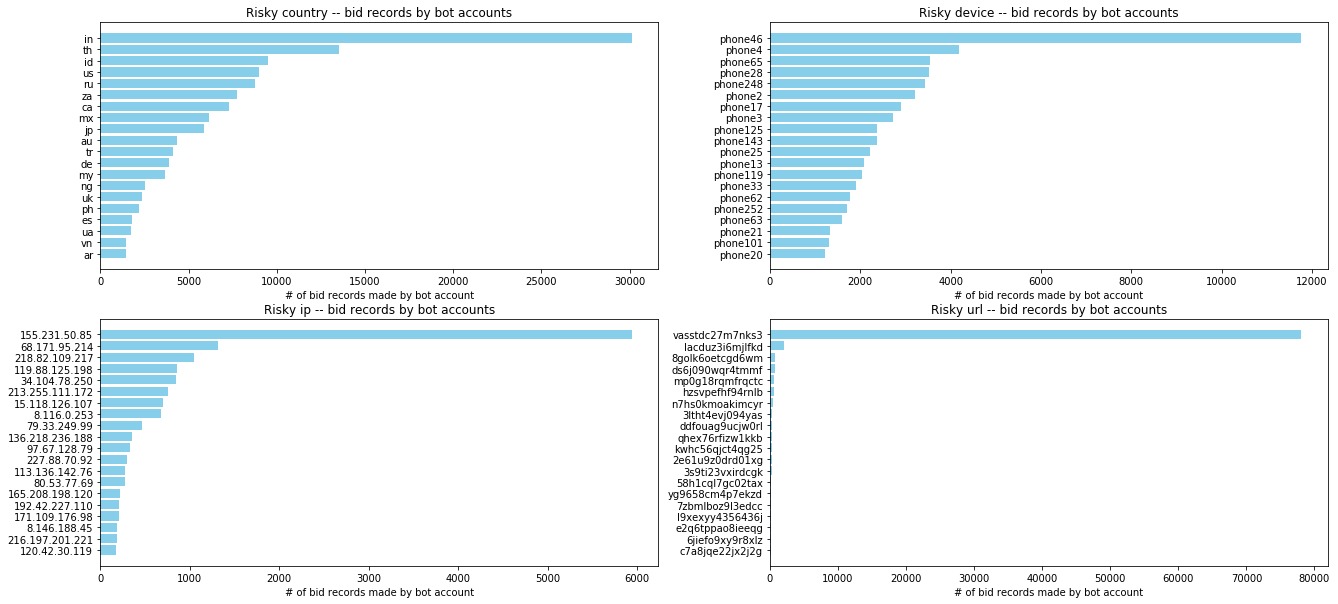

In [129]:
index = 0
plt.figure(figsize=(22,10))
features = ['country','device','ip','url']
for feature in features:
    index += 1
    plt.subplot(2,2, index)
    data = df_train.groupby([feature])['outcome'].sum()\
            .sort_values(ascending=False)
    data = data.reset_index()[0:20]
    importances = data['outcome']
    features_name = data[feature]
    indices = np.argsort(importances)
    plt.title('Risky '+ str(feature) + ' -- bid records by bot accounts')
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), features_name[indices])
    plt.xlabel('# of bid records made by bot account')
plt.show()

#### Model building 

### <span style="color:red"> Logistic regression </span>

In [130]:
combined_feature = pd.merge(quant_feature_train, \
                           quality_feature_train, on = 'bidder_id')

In [131]:
combined_feature = combined_feature.drop(['merchandise'],axis=1)

In [132]:
# combine the above features
combined_feature.head() 

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [133]:
#combine the features with train_accounts
dfLR_train = pd.merge(combined_feature, \
                     train_accounts, on = 'bidder_id')
dfLR_train.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address,outcome
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451,a3d2de7675556553a5f08e4c88d2c228ub9v1,f61893a13012022c0d7f875d2030805dagxm1,0.0
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389,a3d2de7675556553a5f08e4c88d2c228d99fp,f1cbc047730182fce18540c4915fb609uzqae,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563,f1620859bb80f8fe791bf5c3cddd0b54ezi86,c94cf5c3c5205afe0ef14ce669e015650as54,0.0
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509,240f40b4e3ce8f0d3bf8b7abdcf7e9d955tqa,58048808b920ee7ff05d34d2f817dae1vt41w,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938,a3d2de7675556553a5f08e4c88d2c228x4b9d,c76d416cc847dfcbc9755f743e15dc5a4ms5q,0.0


In [134]:
XLR_train = dfLR_train.drop(['bidder_id', 'payment_account', 'address',\    # features
                            'outcome'], 1)
yLR_train = dfLR_train['outcome']             # outcome

In [135]:
XLR_train.head()

,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [136]:
combined_feature = pd.merge(quant_feature_test, quality_feature_test, on='bidder_id')

In [137]:
combined_feature = combined_feature.drop(['merchandise'],axis=1)
combined_feature.head()                                           # test data

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907


In [138]:
dfLR_test = pd.merge(combined_feature, test_accounts, on='bidder_id')
XLR_test = dfLR_test.drop(['bidder_id','payment_account', 'address'], 1) # separate outcome and feature for test data

In [139]:
XLR_test.head()

,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907
1,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907
2,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907
3,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907
4,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907


### <span style="color:red"> Naive bayes </span>

In [140]:
train_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9643643578947368,us,44.77.106.238,vasstdc27m7nks3
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9768433263157894,in,57.163.90.101,vasstdc27m7nks3


In [141]:
def riskScoreBayes(data, ref, faetures):
    risk = dict()
    for feature in features:
        risk_con = pd.DataFrame(ref.groupby([feature])['outcome'].sum()\
                                /np.sum(ref['outcome'])).reset_index()
        risk_con.columns = [feature, str(feature+'_risk')]
        p_xi_given_y_total = pd.DataFrame(ref.groupby([feature])['outcome'].count()\
                     /(len(ref)-np.sum(ref['outcome']))).reset_index()
        p_xi_given_y_bad = pd.DataFrame(ref.groupby([feature])['outcome'].sum()\
                     /(len(ref)-np.sum(ref['outcome']))).reset_index()
        normal_con = pd.merge(p_xi_given_y_total, p_xi_given_y_bad, on=feature)
        normal_con[str(feature+'_normal')] = normal_con['outcome_x']-normal_con['outcome_y']
        feature_risk = pd.merge(risk_con,normal_con,on=feature)
        feature_risk = feature_risk[[feature, str(feature+'_risk'),str(feature+'_normal')]]
        if feature == 'merchandise':
            infer_risk = np.mean(feature_risk[str(feature+'_risk')])
            infer_normal = np.mean(feature_risk[str(feature+'_normal')])
            feature_risk = feature_risk.append({'merchandise':'clothing', \
                                'merchandise_risk':infer_risk, \
                                'merchandise_normal':infer_normal}, ignore_index=True)
        risk[feature] = feature_risk
    res = data
    for feature in features:
        res = pd.merge(res, risk[feature], on=feature)
    return res

In [142]:
features = ['auction','device','country','merchandise','ip','url']

In [143]:
dfNB_train = riskScoreBayes(df_train, df_train, features)

In [144]:
#fea+normal means the probability of given y=0 (outcome human) , the people of that feature
dfNB_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome,...,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9640271842105263,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636084578947368,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9638806631578947,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636085421052631,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162


In [145]:
dfNB_test = riskScoreBayes(df_test, df_train, features)

In [147]:
prior_1 = np.sum(dfNB_train.outcome)/len(dfNB_train)
prior_0 = 1-prior_1

In [148]:
print '[prior_1, prior_0]: '+str([prior_1, prior_0])

[prior_1, prior_0]: [0.2670443338374029, 0.7329556661625971]


In [149]:
dfNB_test.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,auction_risk,...,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,1944758,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,lg9bk,office equipment,phone99,9770211736842105,th,59.246.142.163,dzd3lg4xy0irlvg,0.000080,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
1,1944802,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,cxozc,office equipment,phone99,9770212105263157,th,59.246.142.163,dzd3lg4xy0irlvg,0.000100,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
2,1944765,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,ijru6,office equipment,phone99,9770211789473684,th,59.246.142.163,dzd3lg4xy0irlvg,0.000060,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
3,1944748,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,psscd,office equipment,phone99,9770211684210526,th,59.246.142.163,dzd3lg4xy0irlvg,0.000053,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
4,1944778,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,fbp7d,office equipment,phone99,9770211894736842,th,59.246.142.163,dzd3lg4xy0irlvg,0.000053,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0


In [150]:
XNB_train = dfNB_train[['auction_risk','auction_normal',\
                        'device_risk', 'device_normal',\
                        'country_risk', 'country_normal',\
                        'merchandise_risk','merchandise_normal',\
                        'ip_risk', 'ip_normal',\
                        'url_risk', 'url_normal']]
yNB_train_bid_level = dfNB_train[['outcome']]

In [151]:
XNB_train.head()

,auction_risk,auction_normal,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
1,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
2,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
3,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
4,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162


In [152]:
XNB_test = dfNB_test[['auction_risk','auction_normal',\
                     'device_risk', 'device_normal',\
                     'country_risk', 'country_normal',\
                      'merchandise_risk','merchandise_normal',\
                     'ip_risk', 'ip_normal',\
                     'url_risk', 'url_normal']]

In [153]:
XNB_test.head()

,auction_risk,auction_normal,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,0.000080,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
1,0.000100,0.000264,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
2,0.000060,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
3,0.000053,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
4,0.000053,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0


#### Prediction

#### <span style="color:red"> Logistic regression </span>

In [154]:
XLR_train.head()

,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [155]:
yLR_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: outcome, dtype: float64

In [156]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(XLR_train, yLR_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
yLR_train_pred = LR.predict_proba(XLR_train) ## check train dataset
yLR_test_pred = LR.predict_proba(XLR_test) ## applied on test dataset for prediction

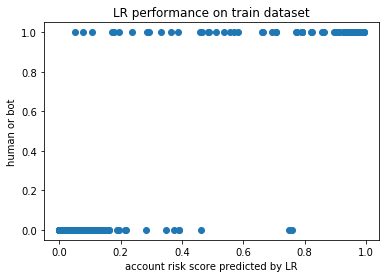

In [158]:
plt.plot(yLR_train_pred[:,1], yLR_train, 'o')
plt.xlabel('account risk score predicted by LR')
plt.ylabel('human or bot')
plt.title('LR performance on train dataset')
plt.show()

In [159]:
dfLR_test.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907,a3d2de7675556553a5f08e4c88d2c22886sbt,1df0b2cb82cd98e90972acc8e8a752detwki0
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907,a3d2de7675556553a5f08e4c88d2c22848lqa,022b06519985716abd9fc8ce83540d58wsgo1
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907,a3d2de7675556553a5f08e4c88d2c228aiumg,a3d2de7675556553a5f08e4c88d2c228y7jgq


In [160]:
dfLR_test['p_risk'] = yLR_test_pred[:,1]

In [161]:
dfLR_test.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address,p_risk
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0.056587
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,0.761137
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907,a3d2de7675556553a5f08e4c88d2c22886sbt,1df0b2cb82cd98e90972acc8e8a752detwki0,0.769802
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907,a3d2de7675556553a5f08e4c88d2c22848lqa,022b06519985716abd9fc8ce83540d58wsgo1,0.230280
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907,a3d2de7675556553a5f08e4c88d2c228aiumg,a3d2de7675556553a5f08e4c88d2c228y7jgq,0.158828


In [162]:
test_accounts.head()

,bidder_id,payment_account,address
0,fb92fc925c5df50f4da7874a7542cf2210z1f,a3d2de7675556553a5f08e4c88d2c2285fa8i,a3d2de7675556553a5f08e4c88d2c228g8zew
1,d29003d7f3ec1f0e4ca9cc17e6389b4a4phcg,a0dc95936282ff8eef7ffa54f295255ctyafs,fa442b098896fe3f9aca16a6f100e597e5rky
2,12d6239a92972a35bc990225b3ab33466znm8,a3d2de7675556553a5f08e4c88d2c228vmub2,15377fd75760546b111f7cfc5d3b7ea3v9dfw
3,d0231e5200b870c055db7e3daae24bc8lt7at,b1b2ce3ff9eba49de46c2b1494944815xrdly,8237603cedb76af6dd5adb06a120deac3vous
4,1ae57d217b27820cabf6e24b721bfb38s6ja0,6dc76e92d02ce4f4af55f858987ce516zpjql,c2e2ffcffb384ca6ced38bbd9a5c5a62bh8wp


In [163]:
yLR_test_pred = np.array(pd.merge(test_accounts, dfLR_test, on='bidder_id')['p_risk'])

#### <span style="color:red"> Naive bayes </span>

In [164]:
def bayesPred(data, features, prior):
    p_normal = pd.Series(prior[0]*np.ones(len(data)))
    p_risk = pd.Series(prior[1]*np.ones(len(data)))
    for feature in features:
        p_normal=p_normal*data[str(feature)+'_normal']
        p_risk=p_risk*data[str(feature)+'_risk']
    return p_normal, p_risk

In [165]:
features = ['auction','device','merchandise','country','ip','url']
prior = [prior_0, prior_1]

In [166]:
p_normal, p_risk = bayesPred(XNB_train, features, prior)
dfNB_train['p_normal'] = p_normal/(p_normal+p_risk)
dfNB_train['p_risk'] = p_risk/(p_normal+p_risk)
dfNB_train_bayes = dfNB_train[['bid_id','bidder_id','p_normal','p_risk']]

In [167]:
df_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0
1,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3,0.0
2,5348147,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,aornh,office equipment,phone508,9695972789473684,tw,94.77.24.125,qnvyrbe2q64485d,0.0
3,6956888,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone35,9705076631578947,ke,150.72.18.78,0i79k658qw670j2,0.0
4,5539232,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,vceur,office equipment,phone229,9696822105263157,fr,246.147.189.47,8j97azbkxfm2axh,0.0


In [168]:
dfNB_train_bayes.head()

,bid_id,bidder_id,p_normal,p_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302


In [169]:
nb_summary_train = pd.merge(train_bids, dfNB_train_bayes, on=['bid_id','bidder_id'])

In [170]:
nb_summary_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,p_normal,p_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.998698,0.001302
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7,1.000000,0.000000
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9643643578947368,us,44.77.106.238,vasstdc27m7nks3,0.000000,1.000000
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3,1.000000,0.000000
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9768433263157894,in,57.163.90.101,vasstdc27m7nks3,0.000000,1.000000


In [176]:
NBS_train = nb_summary_train.groupby('bidder_id')['p_risk'].quantile(.5).reset_index()
yNB_train_pred = NBS_train['p_risk']

In [177]:
NBS_train.head()

,bidder_id,p_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.0
1,01349288df20199905e719f0ff7ee771nwryj,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.0
3,01c5692d487454cdbe731df330bef608f48zz,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.0


In [178]:
NBS_train = pd.merge(NBS_train, train_accounts, on='bidder_id')\
    .drop(['payment_account','address'],axis=1)

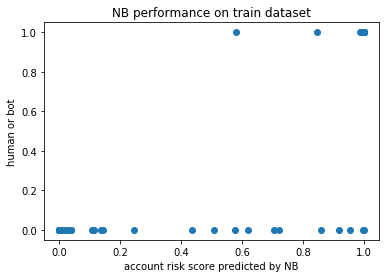

In [179]:
plt.plot(NBS_train['p_risk'], NBS_train['outcome'], 'o')
plt.xlabel('account risk score predicted by NB')
plt.ylabel('human or bot')
plt.title('NB performance on train dataset')
plt.show()

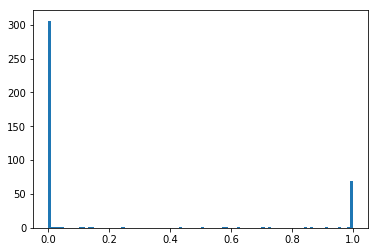

In [180]:
plt.hist(NBS_train['p_risk'], bins=100)
plt.show()

In [182]:
p_normal, p_risk = bayesPred(XNB_test, features, prior)
dfNB_test['p_normal'] = p_normal/(p_normal+p_risk)
dfNB_test['p_risk'] = p_risk/(p_normal+p_risk)
dfNB_test_bayes = dfNB_test[['bid_id','bidder_id','p_normal','p_risk']]
nb_summary_test = pd.merge(test_bids, dfNB_test_bayes, on=['bid_id','bidder_id'])
NBS_test = nb_summary_test.groupby('bidder_id')['p_risk'].quantile(.5).reset_index()
yNB_test_pred = NBS_test['p_risk']

In [183]:
NBS_test = NBS_test.fillna(0)
NBS_test.head()

,bidder_id,p_risk
0,001068c415025a009fee375a12cff4fcnht8y,0.000052
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.839159
2,03244a553a252dcc3a3037f0371c8d33fmpd1,0.000000
3,067ff22ebf0d33fe0deedc816d75973865jo7,0.066606
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,0.566549


In [184]:
np.set_printoptions(suppress=True)
yNB_test_pred = np.array(pd.merge(test_accounts, NBS_test, on='bidder_id')['p_risk'])

#### Performance evaluation

In [188]:
len(test_accounts)

143

In [189]:
test_accounts.head()

,bidder_id,payment_account,address
0,fb92fc925c5df50f4da7874a7542cf2210z1f,a3d2de7675556553a5f08e4c88d2c2285fa8i,a3d2de7675556553a5f08e4c88d2c228g8zew
1,d29003d7f3ec1f0e4ca9cc17e6389b4a4phcg,a0dc95936282ff8eef7ffa54f295255ctyafs,fa442b098896fe3f9aca16a6f100e597e5rky
2,12d6239a92972a35bc990225b3ab33466znm8,a3d2de7675556553a5f08e4c88d2c228vmub2,15377fd75760546b111f7cfc5d3b7ea3v9dfw
3,d0231e5200b870c055db7e3daae24bc8lt7at,b1b2ce3ff9eba49de46c2b1494944815xrdly,8237603cedb76af6dd5adb06a120deac3vous
4,1ae57d217b27820cabf6e24b721bfb38s6ja0,6dc76e92d02ce4f4af55f858987ce516zpjql,c2e2ffcffb384ca6ced38bbd9a5c5a62bh8wp


In [185]:
yLR_test_pred

array([0.22374705, 0.1788209 , 0.11581192, 0.04551051, 0.03899588,
       0.03373856, 0.10964068, 0.07591939, 0.08030192, 0.09627617,
       0.07348234, 0.04722405, 0.0439117 , 0.05658666, 0.16621347,
       0.05368818, 0.02294895, 0.00314072, 0.0173418 , 0.76113692,
       0.10022696, 0.01923162, 0.15882787, 0.03068108, 0.02201338,
       0.00078302, 0.15831054, 0.11755194, 0.06692105, 0.04941983,
       0.19237891, 0.02324059, 0.04968798, 0.01173743, 0.0951648 ,
       0.04857112, 0.2607194 , 0.1094862 , 0.036791  , 0.04131565,
       0.05232307, 0.05054287, 0.0796073 , 0.02607578, 0.04981275,
       0.02675043, 0.04171444, 0.65288921, 0.08121627, 0.04374074,
       0.04400912, 0.02198345, 0.05234111, 0.76980163, 0.00882249,
       0.45359662, 0.23028031, 0.11808848, 0.05852872, 0.01167216,
       0.07971824, 0.06329536, 0.04735543, 0.64738807, 0.25976244,
       0.14492734, 0.00625444, 0.00814497, 0.08160132, 0.10177544,
       0.07815239, 0.37242543, 0.09996532, 0.03160194, 0.01453

In [190]:
yNB_test_pred

array([0.84328196, 0.03334475, 0.01569413, 0.0008456 , 0.        ,
       0.        , 0.40511064, 0.00646971, 0.        , 0.1988556 ,
       0.41811312, 0.00978273, 0.        , 0.0000525 , 0.90182657,
       0.        , 0.00850487, 0.        , 0.00085219, 0.83915905,
       0.04209029, 0.        , 0.56654942, 0.00764382, 0.        ,
       0.00029273, 0.09053959, 0.00034008, 0.01334738, 0.09534363,
       0.22355525, 0.        , 0.        , 0.00188502, 0.01961554,
       0.03992513, 1.        , 0.02902784, 0.        , 0.0000397 ,
       0.03955781, 0.        , 0.        , 0.03974315, 0.00922667,
       0.        , 0.11951145, 1.        , 0.04284575, 0.12539771,
       0.        , 0.00000207, 0.03870913, 0.        , 0.02258419,
       0.99798468, 0.06660597, 0.        , 0.00822772, 0.00144639,
       0.04326379, 0.10194806, 0.10517336, 1.        , 0.48999493,
       0.34983115, 0.        , 0.        , 0.0061992 , 0.07898458,
       0.00000575, 0.84576513, 0.36771655, 0.00064456, 0.     

In [191]:
y_test_ground = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,\
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,\
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,\
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,\
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,\
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [192]:
y_test_ground

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

##### Log loss evaluation

In [193]:
from sklearn.metrics import log_loss ## analogy to MSE for regression 

In [194]:
log_loss(y_test_ground, yLR_test_pred)

0.451757756292819

In [195]:
log_loss(y_test_ground, yNB_test_pred)

1.6907952417100875

##### ROC curve

In [196]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [197]:
fpr_lr, tpr_lr, _ = roc_curve(y_test_ground, yLR_test_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test_ground, yNB_test_pred)
auc_lr = roc_auc_score(y_test_ground, yLR_test_pred)
auc_nb = roc_auc_score(y_test_ground, yNB_test_pred)

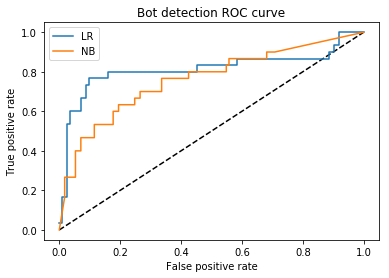

auc LR -- 0.81, auc NB -- 0.76


In [199]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_nb, tpr_nb, label='NB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Bot detection ROC curve')
plt.legend(loc='best')
plt.show()
print 'auc LR -- {0:0.2f}'.format(auc_lr) + ', auc NB -- {0:0.2f}'.format(auc_nb)

##### Precision-recall curve

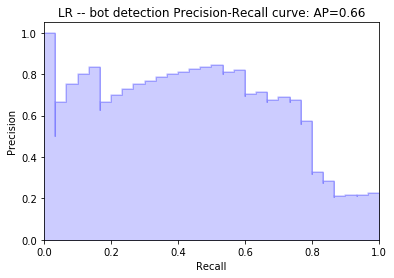

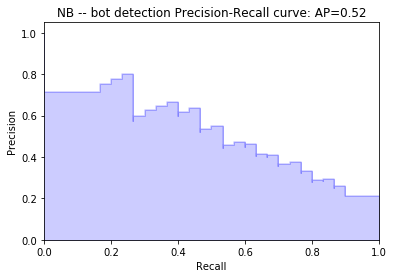

In [200]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

for method in ['LR', 'NB']:
    if method == 'LR':
        y_score = yLR_test_pred
    if method == 'NB':
        y_score = yNB_test_pred
    average_precision = average_precision_score(y_test_ground, y_score)
    precision, recall, _ = precision_recall_curve(y_test_ground, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(method +' -- bot detection Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

**AI good or evil？**
